Comparison wip

https://colab.research.google.com/drive/1sfevYBDagoC2q93tcXuWfvUn1XmlOLJL?usp=sharing

In [1]:


from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
from  google.colab import drive

In [3]:
## uncomment and rerun for yourselves
path = '/content/drive'
drive.mount(path)


Mounted at /content/drive


Loading Helper and Cosntants

In [4]:

#helper Functions

%run '/content/drive/MyDrive/Project/After Mid Sem Work/pyNotebooks/helper_functions.ipynb'

     |████████████████████████████████| 6.3 MB 7.2 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
[*********************100%***********************]  1 of 1 completed
[1 2 3 4] [5 6 7]
[1 2 3 4 5 6 7] [ 8  9 10]


In [5]:
# constants

%run '/content/drive/MyDrive/Project/After Mid Sem Work/pyNotebooks/Constants.ipynb'

In [6]:
 import numpy as np
 import pandas as pd
 import datetime

In [7]:
import seaborn as sns
sns.set()

In [8]:
from matplotlib.figure import Figure

In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt


In [401]:
import statistics

Code


In [10]:
dict_of_rmse = {} #dict of tupples , " train rmse, test rmse"

In [11]:
# by default will fetch from oct 1st 2016 to oct 1st 2021 
sbi_data = fetch_data_from_yfinance(sbi_ticker)

[*********************100%***********************]  1 of 1 completed


In [12]:
sbi_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-03,253.000000,256.649994,252.649994,255.300003,250.697327,9314647
2016-10-04,255.800003,262.000000,253.800003,259.750000,255.067078,21532806
2016-10-05,262.000000,264.899994,259.549988,260.850006,256.147278,20868556
2016-10-06,261.350006,262.000000,255.649994,256.799988,252.170258,11081154
2016-10-07,257.250000,259.899994,255.250000,258.700012,254.036026,11934100


In [13]:
#For TCS Data
tcs_data = fetch_data_from_yfinance(tcs_ticker)

[*********************100%***********************]  1 of 1 completed


In [14]:
tcs_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-03,1225.0,1228.824951,1200.550049,1205.849976,1092.101074,1818880
2016-10-04,1210.0,1212.525024,1199.000000,1202.574951,1089.135376,1780718
2016-10-05,1204.0,1207.699951,1188.050049,1193.175049,1080.622070,1176354
2016-10-06,1197.5,1201.199951,1186.375000,1194.375000,1081.708984,2267572
2016-10-07,1194.0,1194.000000,1179.099976,1183.900024,1072.222046,1816512


#### ---> sbi1 : sbi_dataset with one year of data
#### ---> sbi3 : sbi_dataset with 2 years of data
#### ---> sbi5 : sbi_dataset with 4 years of data


In [15]:
## Let's divide our intitally loaded sbi_data into 3 separate sets with one year, 2 years and 4 years of data respectively

In [16]:
## checking sbi_data is still accesible or not
sbi_data.index

DatetimeIndex(['2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06',
               '2016-10-07', '2016-10-10', '2016-10-13', '2016-10-14',
               '2016-10-17', '2016-10-18',
               ...
               '2021-09-17', '2021-09-20', '2021-09-21', '2021-09-22',
               '2021-09-23', '2021-09-24', '2021-09-27', '2021-09-28',
               '2021-09-29', '2021-09-30'],
              dtype='datetime64[ns]', name='Date', length=1234, freq=None)

In [17]:
tcs_data.index

DatetimeIndex(['2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06',
               '2016-10-07', '2016-10-10', '2016-10-13', '2016-10-14',
               '2016-10-17', '2016-10-18',
               ...
               '2021-09-17', '2021-09-20', '2021-09-21', '2021-09-22',
               '2021-09-23', '2021-09-24', '2021-09-27', '2021-09-28',
               '2021-09-29', '2021-09-30'],
              dtype='datetime64[ns]', name='Date', length=1234, freq=None)

####Defining the datasets

In [18]:

df_years_4 = pd.DataFrame(sbi_data.loc['2015-01':'2019-01', 'Close'],columns=['Date','Close'])
df_years_2 = pd.DataFrame(sbi_data.loc['2017-01':'2019-01', 'Close'],columns=['Date','Close']) 
df_years_1 = pd.DataFrame(sbi_data.loc['2018-01':'2019-01', 'Close'],columns=['Date','Close'])
df_years_1_adj = pd.DataFrame(sbi_data.loc['2018-01':'2019-01','Adj Close'],columns=['Date','Adj Close'])

In [19]:
df_years_4.head()

,Date,Close
Date,,
2016-10-03,NaN,255.300003
2016-10-04,NaN,259.750000
2016-10-05,NaN,260.850006
2016-10-06,NaN,256.799988
2016-10-07,NaN,258.700012


In [20]:
tcs_df_4years = pd.DataFrame(tcs_data.loc['2015-01':'2018-12', 'Close'])
tcs_df_1year = pd.DataFrame(tcs_data.loc['2018-01':'2019-12', 'Close'])
tcs_df_4years.columns

Index(['Close'], dtype='object')

In [21]:
tcs_df_4years.head()

,Close
Date,
2016-10-03,1205.849976
2016-10-04,1202.574951
2016-10-05,1193.175049
2016-10-06,1194.375000
2016-10-07,1183.900024


In [22]:
tcs_df_4years.tail()

,Close
Date,
2018-12-24,1918.500000
2018-12-26,1889.199951
2018-12-27,1908.949951
2018-12-28,1896.050049
2018-12-31,1893.050049


### `For one year of stock data, modelling on ->CLOSE<- as well as ->ADJ CLOSE<- will be done for comparison purpose`

In [23]:
#Let's import required libraries

import tensorflow

In [24]:
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense
from tensorflow.keras.layers import Input ##for specifying the input Layer 

In [25]:
##StandardScaler has already been imported
from tensorflow.keras.optimizers import Adam ## Other optimizers will check later
from tensorflow.keras.models import Model as mdl

In [26]:
## first of all let's create the model for 4 years of sbi stock data -->df_years_4
print(f'Total number of instances: {len(df_years_4)}')
print(f'columns: {df_years_4.columns}')

Total number of instances: 578
columns: Index(['Date', 'Close'], dtype='object')


In [27]:
#For TCS Data
print(f'Total number of instances: {len(tcs_df_4years)}')
print(f'columns: {tcs_df_4years.columns}')

Total number of instances: 555
columns: Index(['Close'], dtype='object')


### Function ALERT!
### `reshape_scale_return(data, verbose=False) ---> returns **D1**`
###  Defining a generic function that reshapes, standardizes and returns the flattened series

In [28]:
def reshape_scale_return(data, verbose=False):

  select_data = data.values
  select_data = select_data.reshape(-1,1)## this reshaping was done, why? To get mX1 array
  
  ##This train length corresponds to the one used for standardizing
  train_length = int(len(select_data)/2)

  scaling_instance = StandardScaler().fit(select_data[:train_length])

  ##only used half of the data to fit scaling instance 
  scaled_data = scaling_instance.transform(select_data)## calling the scaler now over the whole data
  
  if(verbose == True):
    print(f'Shape after scaling and before flattening: {scaled_data.shape}')
    print(f'Shape after scaling and flattening: {scaled_data.flatten().shape}')
  
  return scaled_data.flatten()

In [29]:
closed_data = reshape_scale_return(df_years_4['Close'])
closed_data.shape

(578,)

In [30]:
closed_data = closed_data.flatten()## so as to deal with one dimensional array
closed_data.shape

(578,)

In [31]:
tcs_closed_data = reshape_scale_return(tcs_df_4years['Close'])
tcs_closed_data.shape

(555,)

###Function ALERT!

###` fit_lstm(X,Y,window_size,loss=mse,optimizer=Adam,learning_rate = 0.1) `

###Train LSTM and return the fitted model

In [32]:
def fit_lstm(X , Y , window_size,epochs =100,loss = 'mse', optimizer = Adam , learning_rate = 0.1,train_len_ratio = 0.5):

  W =window_size

  loss = loss
  rate_of_learning = learning_rate

  optimizer = optimizer(learning_rate = rate_of_learning)

  shape = (W,1)

  input = Input(shape=shape)

  layer_rnn = LSTM(5)(input)
  layer_rnn = Dense(1)(layer_rnn)

  model_rnn = mdl(input, layer_rnn)
  model_rnn.compile(loss=loss, optimizer = optimizer, )

  train_len = int(len(X)* train_len_ratio)

  validation_set = (X[-train_len:], Y[-train_len:])

  result = model_rnn.fit(X[:-train_len], Y[:-train_len], epochs=epochs, validation_data = validation_set,validation_steps=1)

  return model_rnn,result

### Function ALERT!
### `customize_dataset(**D1**, window_size = default set to 10) `
###  Defining a custom dataset formulator, that takes a series data(returned from the previous step) and

In [33]:
def customize_dataset(data, window_size = 10):
  ###----> Pointer 1 
  list1 = list()
  list2 = list()

  W = window_size #--> denotes series length
  
  range_length = len(data) - W
  
  for at_instance in np.arange(0, range_length):
    start = at_instance
    end = at_instance + W
    val1 = data[start: end]
    val2 = data[end]
    list1.append(val1)
    list2.append(val2)
  
  list1 = np.array(list1)##converted to numpy array
  list1 = list1.reshape(-1,W,1) ## why was this  done?? This is the dimension (mxnx1) form needed to be given to the RNN
  list2 = np.array(list2)
  N = len(list1)
  print("Dataset has been formulated, sending 3 values")
  return N, list1, list2

###4 years forecasting

#####Creating Train Test split of the dataset : For 4 year keeping 3 year for train 1 year for test

#####Sbi data

In [34]:
train_data = pd.DataFrame(df_years_4.loc['2015-01':'2018-01', 'Close'],columns=['Date','Close'])

test_data = pd.DataFrame(df_years_4.loc['2018-02':'2019-01', 'Close'],columns=['Date','Close'])



In [35]:
rsr_data =  reshape_scale_return(train_data['Close'])

N, X_train_4, Y_train_4 = customize_dataset(rsr_data, 10) 

Dataset has been formulated, sending 3 values


In [36]:
rsr_data =  reshape_scale_return(test_data['Close'])

N, X_test_4, Y_test_4 = customize_dataset(rsr_data, 10) 

Dataset has been formulated, sending 3 values


In [37]:
print("X_test: ",X_test_4.shape," X_train: ",X_train_4.shape," Y_train : ",Y_train_4.shape," Y_test: ",Y_test_4.shape)

X_test:  (237, 10, 1)  X_train:  (321, 10, 1)  Y_train :  (321,)  Y_test:  (237,)


In [ ]:
#fitting only on train data

model_with_4_years,history = fit_lstm(X_train_4,Y_train_4,window_size=10)

In [39]:
#predicting only on test data
pred_4_year = model_with_4_years.predict(X_test_4)

In [40]:
forecast_4_test = pred_4_year[:,0]

In [41]:
rmse_4_year_test = mean_squared_error(Y_test_4, forecast_4_test)
rmse_4_year_test

0.13462560571906712

Text(0.5, 1.0, 'One Step forecast on test data with 4 years of sbi stock data')

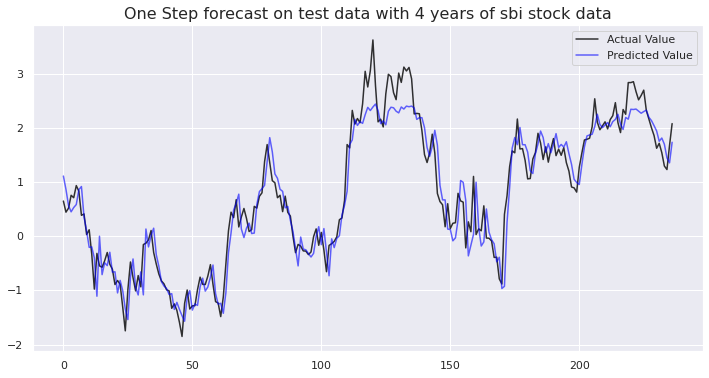

In [42]:
plt.figure(figsize=(12,6))

plt.plot(Y_test_4, color= 'black', label = "Actual Value", alpha=0.8)

plt.plot(forecast_4_test, color='blue', label = "Predicted Value", alpha=0.6)
plt.legend()
plt.title('One Step forecast on test data with 4 years of sbi stock data', fontsize = 16.0) 

In [43]:
#predicting only on test data
pred_4_year_train = model_with_4_years.predict(X_train_4)

In [44]:
forecast_4_train = pred_4_year_train[:,0]

In [45]:
rmse_4_year_train = mean_squared_error(Y_train_4, forecast_4_train)
rmse_4_year_train

0.24555503301884482

#####TCS Data

In [46]:
#For TCS Data
tcs_4years_train_data = pd.DataFrame(tcs_df_4years.loc['2015-01':'2018-01','Close'])
tcs_4years_test_data = pd.DataFrame(tcs_df_4years.loc['2018-02':'2019-01','Close'])

In [47]:
tcs_4years_rsr_data =  reshape_scale_return(tcs_4years_train_data['Close'])

tcs_4years_N, tcs_4years_X_train, tcs_4years_Y_train = customize_dataset(tcs_4years_rsr_data, 10) 

Dataset has been formulated, sending 3 values


In [48]:
tcs_4years_rsr_data =  reshape_scale_return(tcs_4years_test_data['Close'])

tcs_4years_N, tcs_4years_X_test, tcs_4years_Y_test = customize_dataset(tcs_4years_rsr_data, 10) 

Dataset has been formulated, sending 3 values


In [49]:
print("X_test: ",tcs_4years_X_test.shape," X_train: ",tcs_4years_X_train.shape," Y_train : ",tcs_4years_Y_train.shape," Y_test: ",tcs_4years_Y_test.shape)

X_test:  (214, 10, 1)  X_train:  (321, 10, 1)  Y_train :  (321,)  Y_test:  (214,)


In [ ]:
#Fitting train data - TCS 4 years

tcs_model_with_4_years, tcs_history = fit_lstm(tcs_4years_X_train,tcs_4years_Y_train,window_size=10)

Test acc

In [51]:
#Predicting on Test Data - TCS 4 years
tcs_pred_4_year_test = tcs_model_with_4_years.predict(tcs_4years_X_test)

In [52]:
tcs_pred_4_year_test[:,0][:5]

array([-1.2234273, -1.2010256, -1.2511548, -1.1590348, -0.7813798],
      dtype=float32)

In [53]:
tcs_forecast_4_test = tcs_pred_4_year_test[:,0]

In [54]:
tcs_rmse_4_year_test = mean_squared_error(tcs_4years_Y_test, tcs_forecast_4_test)
tcs_rmse_4_year_test

0.16397613164108915

Text(0.5, 1.0, 'One Step forecast on test data with 4 years of TCS stock data')

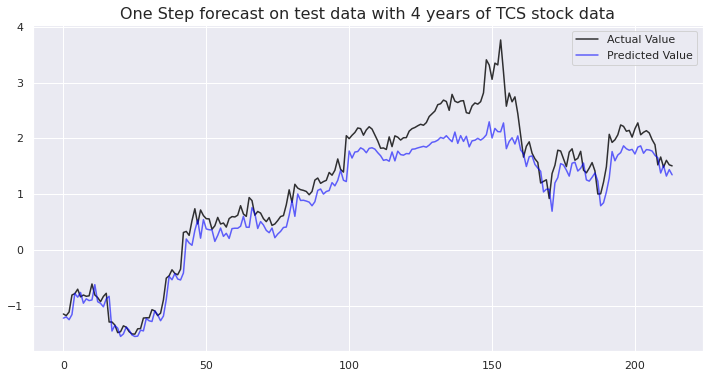

In [55]:
#For TCS Data on Train Data
plt.figure(figsize=(12,6))

plt.plot(tcs_4years_Y_test, color= 'black', label = "Actual Value", alpha=0.8)

plt.plot(tcs_forecast_4_test, color='blue', label = "Predicted Value", alpha=0.6)
plt.legend()
plt.title('One Step forecast on test data with 4 years of TCS stock data', fontsize = 16.0)

Train acc

In [56]:
#Predicting on train data - TCS 4 years
tcs_pred_4_year_train = tcs_model_with_4_years.predict(tcs_4years_X_train)

In [57]:
#For TCS Data
tcs_forecast_4_train = tcs_pred_4_year_train[:,0]

In [58]:
#For TCS Data
tcs_rmse_4_year_train = mean_squared_error(tcs_4years_Y_train, tcs_forecast_4_train)
tcs_rmse_4_year_train

0.7010860370111797

####Loss Per iteration of LSTM

In [59]:
## Plotting loss per iteration 
def loss_plot(result, size, Title="Loss per Iteration"):
  plt.figure(figsize=size)
  plt.plot(result.history['val_loss'], color = 'black', label = 'Validation/Test Loss')
  plt.plot(result.history['loss'], color = 'red', label = 'Training Loss')
  plt.legend()
  plt.title(Title, fontsize=16.0)

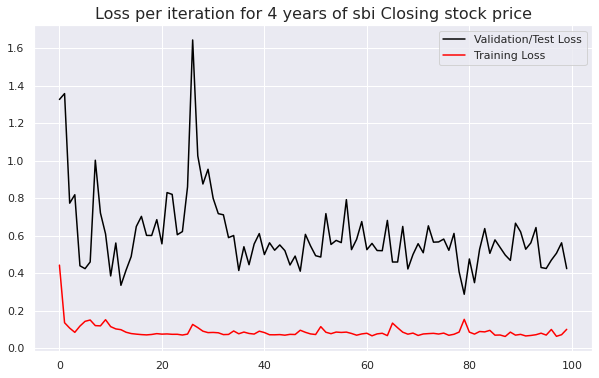

In [60]:
size = (10,6)
Title = "Loss per iteration for 4 years of sbi Closing stock price"
loss_plot(history, size, Title)

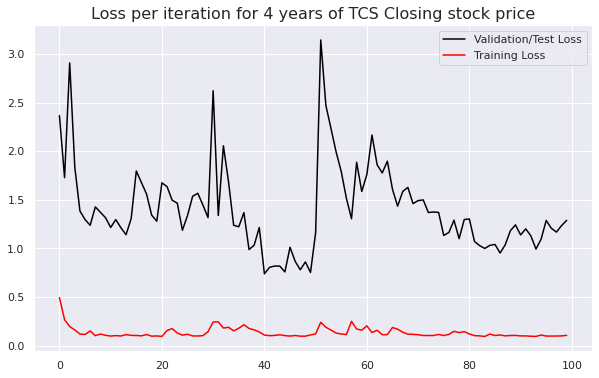

In [61]:
#For TCS 4 years Data
size = (10,6)
Title = "Loss per iteration for 4 years of TCS Closing stock price"
loss_plot(tcs_history, size, Title)

### 1 year forecasting

8  months for train 4 months for test

#####Sbi data

In [62]:
df_years_1.head().index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [63]:
df_years_1.head().index.day

Int64Index([1, 2, 3, 4, 5], dtype='int64', name='Date')

In [64]:
df_years_1.head().index.month

Int64Index([1, 1, 1, 1, 1], dtype='int64', name='Date')

In [65]:
#dates in yyyy-mm-dd 

In [66]:
train_data = pd.DataFrame(df_years_1.loc['2018-01':'2018-08', 'Close'],columns=['Date','Close'])

train_data = pd.DataFrame(df_years_1.loc['2018-09':'2018-12', 'Close'],columns=['Date','Close'])

In [67]:
rsr_data =  reshape_scale_return(train_data['Close'])

N, X_train_1, Y_train_1 = customize_dataset(rsr_data, 10) 

Dataset has been formulated, sending 3 values


In [68]:
rsr_data =  reshape_scale_return(test_data['Close'])

N, X_test_1, Y_test_1 = customize_dataset(rsr_data, 10) 

Dataset has been formulated, sending 3 values


In [ ]:
#fitting only on train data

model_with_1_year,history = fit_lstm(X_train_1,Y_train_1,window_size=10)

In [70]:
#predicting only on test data
pred_1_year_test = model_with_1_year.predict(X_test_1)

In [71]:
forecast_1_test = pred_1_year_test[:,0]

In [72]:
rmse_1_year_test = mean_squared_error(Y_test_1, forecast_1_test)
rmse_1_year_test

0.7735526947233199

Text(0.5, 1.0, 'One Step forecast on test data with 1 year of sbi stock data')

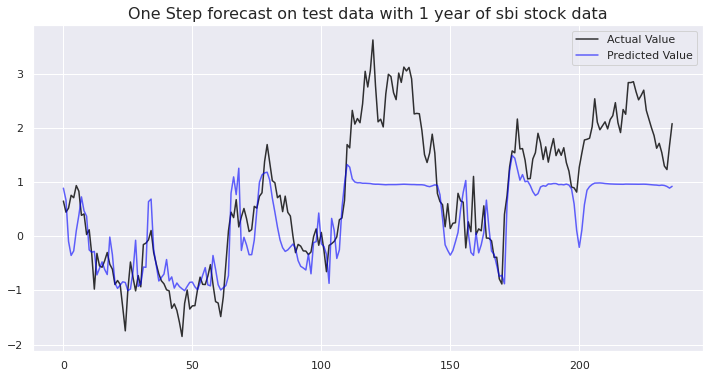

In [73]:
plt.figure(figsize=(12,6))

plt.plot(Y_test_1, color= 'black', label = "Actual Value", alpha=0.8)

plt.plot(forecast_1_test, color='blue', label = "Predicted Value", alpha=0.6)
plt.legend()
plt.title('One Step forecast on test data with 1 year of sbi stock data', fontsize = 16.0) 

#####TCS data

In [74]:
#For TCS Data
tcs_1year_train_data = pd.DataFrame(tcs_df_1year.loc['2018-01':'2018-08','Close'])
tcs_1year_test_data = pd.DataFrame(tcs_df_1year.loc['2018-09':'2018-12','Close'])

In [75]:
train_data = pd.DataFrame(df_years_1.loc['2018-01':'2018-08-30', 'Close'],columns=['Date','Close'])

train_data = pd.DataFrame(df_years_1.loc['2018-08-31':'2019-01', 'Close'],columns=['Date','Close'])

In [76]:
#For TCS Data
tcs_1year_rsr_data =  reshape_scale_return(tcs_1year_train_data['Close'])

tcs_1year_N, tcs_1year_X_train, tcs_1year_Y_train = customize_dataset(tcs_1year_rsr_data, 10)

Dataset has been formulated, sending 3 values


In [77]:
#For TCS Data
tcs_1year_rsr_data =  reshape_scale_return(tcs_1year_test_data['Close'])

tcs_1year_N, tcs_1year_X_test, tcs_1year_Y_test = customize_dataset(tcs_1year_rsr_data, 10)

Dataset has been formulated, sending 3 values


In [ ]:
#Fitting only on TCS 1 year Train data

tcs_model_with_1_year,tcs_history = fit_lstm(tcs_1year_X_train,tcs_1year_Y_train,window_size=10)

In [79]:
#Predicting only on TCS 1 year Test Data
tcs_pred_1_year = tcs_model_with_1_year.predict(tcs_1year_X_test)

In [80]:
#For TCS Data
tcs_forecast_1 = tcs_pred_1_year[:,0]

In [81]:
tcs_rmse_1_year_test = mean_squared_error(tcs_1year_Y_test, tcs_forecast_1)
tcs_rmse_1_year_test

0.2424105185358214

Text(0.5, 1.0, 'One Step forecast on test data with 1 year of TCS stock data')

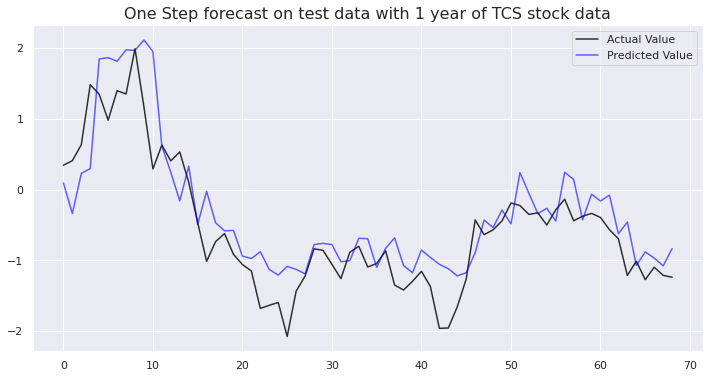

In [82]:
#For TCS Data
plt.figure(figsize=(12,6))

plt.plot(tcs_1year_Y_test, color= 'black', label = "Actual Value", alpha=0.8)

plt.plot(tcs_forecast_1, color='blue', label = "Predicted Value", alpha=0.6)
plt.legend()
plt.title('One Step forecast on test data with 1 year of TCS stock data', fontsize = 16.0) 

## FBProphet (using FBProphet module, will be used to  compare results)
## date- 3 dec

In [339]:
from fbprophet.diagnostics import performance_metrics

In [83]:
def convert_to_proph_df(series):
  df_proph = pd.DataFrame() 
  df_proph['ds'] = series.index
  df_proph['y'] = series.values

  return df_proph



In [84]:
from fbprophet import Prophet

In [ ]:
df_years_1.head()

In [86]:
sbi_1 = df_years_1['Close']

In [87]:
sbi_train_1 = sbi_1.loc['2018-01':'2018-10']

sbi_test_1 = sbi_1.loc['2018-11':'2018-12']

sbi 1 year data

In [88]:
len(sbi_1)

269

In [89]:
sbi_1_train = convert_to_proph_df(sbi_train_1)

sbi_1_test = convert_to_proph_df(sbi_test_1)

In [90]:
len(sbi_1_train)

206

In [91]:
len(sbi_1_test)

40

In [149]:
prophModel_sbi_1 = Prophet()
prophModel_sbi_1.fit(sbi_1_train) 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [150]:
total_period = len(sbi_1_test)
df_future = prophModel_sbi_1.make_future_dataframe(periods=total_period) #hmm so bassicaly this is making up the data for the testing of fb prophet

In [ ]:
df_future.tail() ## this dataframe still does not have the predicted 'target', why?
                 ## because we have not predicted it yet :D

In [95]:
len(df_future)

246

In [152]:
forecasted_df = prophModel_sbi_1.predict(df_future)

In [97]:
len(forecasted_df)

246

In [98]:
len(sbi_1_test)

40

In [ ]:
forecasted_df.head()

In [ ]:
forecasted_df.tail()

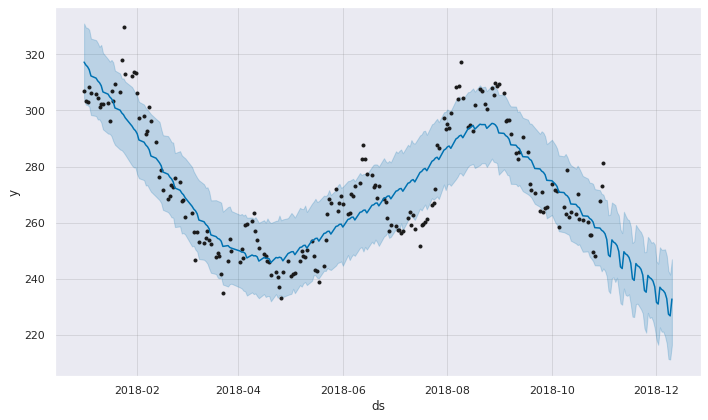

In [101]:
prophModel_sbi_1.plot(forecasted_df)
plt.show()

#####MAE

In [113]:
sbi1_formatted = convert_to_proph_df(sbi_1)

Text(0.5, 1.0, 'Forecast using FbProphet Module')

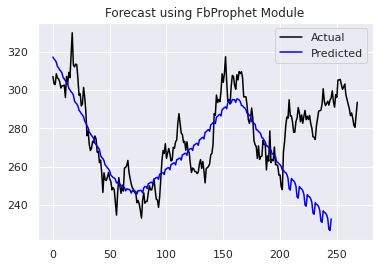

In [116]:
plt.plot(sbi1_formatted['y'], color='black', label='Actual')
plt.plot(forecasted_df['yhat'], color='blue', label='Predicted')
plt.legend()
plt.title('Forecast using FbProphet Module')

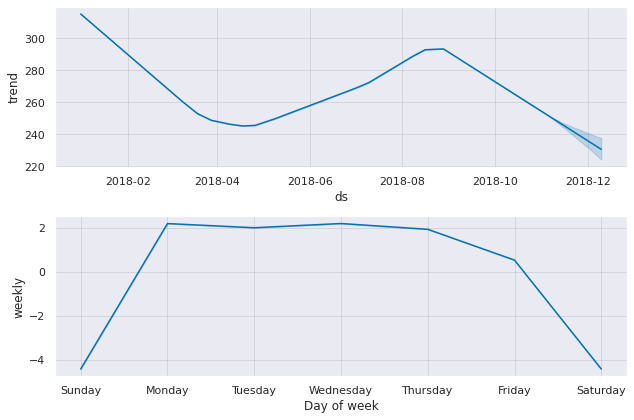

In [340]:
prophModel_sbi_1.plot_components(forecasted_df);

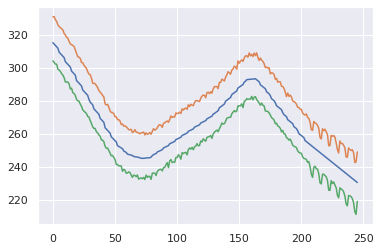

In [341]:
plt.plot(forecasted_df['trend'])## we can use directly data from df to plot for ourselves
plt.plot(forecasted_df.yhat_upper)
plt.plot(forecasted_df['yhat_lower'])

####MAE 

In [355]:
no_of_test_points = len(sbi_1_test)

In [357]:
len(forecasted_df[-no_of_test_points:])

40

In [367]:
predictions = pd.Series(forecasted_df[-no_of_test_points:]['yhat']).fillna(0)

In [ ]:
predictions

In [ ]:
sbi_test_1

In [377]:
residuals = abs(predictions.values - sbi_test_1.fillna(0).values) #facing issues to do train test split here

In [378]:
len(residuals)

40

In [379]:
mae_sbi_1 = statistics.mean(residuals)

In [380]:
mae_sbi_1

44.482134747461465

tcs 1 year

In [276]:
tcs_1 = tcs_df_1year['Close']

In [277]:
tcs_train_1 = tcs_1.loc['2018-01':'2018-10']

tcs_test_1 = tcs_1.loc['2018-11':'2018-12']

In [278]:
tcs_1_train = convert_to_proph_df(tcs_train_1)

tcs_1_test = convert_to_proph_df(tcs_test_1)

In [279]:
prophModel_tcs_1 = Prophet()
prophModel_tcs_1.fit(tcs_1_train) 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [280]:
total_period = len(tcs_1_test)
df_future_tcs = prophModel_tcs_1.make_future_dataframe(periods=total_period) 

In [382]:
forecasted_tcs = prophModel_tcs_1.predict(df_future_tcs)

###MAE

In [383]:
no_of_test_points = len(tcs_1_test)

In [384]:
predictions = pd.Series(forecasted_tcs[-no_of_test_points:]['yhat']).fillna(0)

In [386]:
residuals = abs(predictions.values - tcs_test_1.fillna(0).values) 

In [387]:
mae_tcs_1 = statistics.mean(residuals)

In [388]:
mae_tcs_1

56.923505582337135

sbi 4

In [212]:
sbi_4 = df_years_4['Close']

In [213]:
sbi_train_4 = sbi_4.loc['2015-01':'2018-01']

sbi_test_4 = sbi_4.loc['2018-02':'2019-01']

In [214]:
sbi_4_train = convert_to_proph_df(sbi_train_4)

sbi_4_test = convert_to_proph_df(sbi_test_4)

In [215]:
prophModel_sbi_4 = Prophet()
prophModel_sbi_4.fit(sbi_4_train) 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [216]:
total_period = len(sbi_4_test)
df_future_sbi_4 = prophModel_sbi_4.make_future_dataframe(periods=total_period) 

In [217]:
forecasted_sbi_4 = prophModel_sbi_4.predict(df_future_sbi_4)

In [262]:
predictions_on_test_sbi_4 = forecasted_sbi_4['yhat']

###MAE

In [389]:
no_of_test_points = len(sbi_4_test)

In [390]:
predictions = pd.Series(forecasted_sbi_4[-no_of_test_points:]['yhat']).fillna(0)

In [392]:
residuals = abs(predictions.values - sbi_test_4.fillna(0).values) 

In [393]:
mae_sbi_4 = statistics.mean(residuals)

In [394]:
mae_sbi_4

93.76344450118654

tcs 4

In [211]:
tcs_4 = tcs_df_4years['Close']

In [221]:
tcs_train_4 =  tcs_4.loc['2015-01':'2018-01']
tcs_test_4 = tcs_4.loc['2018-02':'2019-01']

In [222]:
tcs_4_train = convert_to_proph_df(tcs_train_4)

tcs_4_test = convert_to_proph_df(tcs_test_4)

In [223]:
prophModel_tcs_4 = Prophet()
prophModel_tcs_4.fit(tcs_4_train) 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [224]:
total_period = len(tcs_4_test)
df_future_tcs_4 = prophModel_tcs_4.make_future_dataframe(periods=total_period) 

In [225]:
forecasted_tcs_4 = prophModel_tcs_4.predict(df_future_tcs_4)

###MAE

In [395]:
no_of_test_points = len(tcs_4_test)

In [396]:
predictions = pd.Series(forecasted_tcs_4[-no_of_test_points:]['yhat']).fillna(0)

In [397]:
residuals = abs(predictions.values - tcs_test_4.fillna(0).values) 

In [398]:
mae_tcs_4 = statistics.mean(residuals)


In [400]:
mae_tcs_4 #NO KIDDING!!!!

197.9188582755727

##Cross Validation of LSTM , SARIMA , FbProphet

In [119]:
import statistics

In [120]:
dict_of_cross_valid_score = {}

###cross validation on 4 years of sbi data LSTM

In [121]:
cross_valid_output_on_4 = cross_validate_lstm(X=X_train_4,Y=Y_train_4)

In [122]:
cross_valid_output_on_4

[0.28890708088874817,
 2.0646746158599854,
 0.0782780572772026,
 0.9862980246543884,
 0.16765126585960388]

In [123]:
dict_of_cross_valid_score['SBI_data_4_years_LSTM'] = statistics.mean(cross_valid_output_on_4)

###cross valid score on 1 year of sbi data LSTM

In [124]:
cross_valid_output_on_1 = cross_validate_lstm(X=X_train_1,Y=Y_train_1)

In [125]:
dict_of_cross_valid_score['SBI_data_1_year_LSTM'] = statistics.mean(cross_valid_output_on_1)

In [126]:
dict_of_cross_valid_score

{'SBI_data_1_year_LSTM': 1.2320428863167763,
 'SBI_data_4_years_LSTM': 0.7171618089079856}

In [130]:
len(cross_valid_output_on_1)

5

##cross valid on TCS 1

In [402]:
cross_valid_output_on_1_tcs = cross_validate_lstm(X=tcs_1year_X_train,Y=tcs_1year_Y_train)

In [403]:
cross_valid_output_on_1_tcs

[0.11148683726787567,
 1.1964566707611084,
 0.12796425819396973,
 0.5274767875671387,
 0.09833800047636032]

In [404]:
cross_valid_mae_tcs = statistics.mean(cross_valid_output_on_1_tcs)

In [405]:
cross_valid_mae_tcs

0.41234451085329055

##Cross valid on TCS 4

In [407]:
cross_valid_output_on_4_tcs = cross_validate_lstm(X=tcs_4years_X_train,Y=tcs_4years_Y_train)

In [408]:
cross_valid_mae_tcs_4 = statistics.mean(cross_valid_output_on_4_tcs)

In [409]:
cross_valid_mae_tcs_4

0.6367636069655418

##FB Prophet cross validation

In [127]:
from fbprophet import Prophet

In [128]:
from fbprophet.diagnostics import cross_validation

In [178]:
from fbprophet.diagnostics import performance_metrics

sbi 1 year data

In [163]:
from sklearn.model_selection import TimeSeriesSplit

In [169]:
tscv = TimeSeriesSplit(gap =0,n_splits=5)
generator_of_split = tscv.split(sbi_1_train['y'])

In [170]:
list_of_cutoffs = []

In [171]:
for train_index, test_index in generator_of_split:

  cut_off = train_index[-1]
  row_at_cut_off = sbi_1_train.iloc[cut_off]
  list_of_cutoffs.append(row_at_cut_off['ds'])
  
  len_of_horizon = len(sbi_1_train['y'][test_index].values)
  


In [172]:
list_of_cutoffs

[Timestamp('2018-02-21 00:00:00'),
 Timestamp('2018-04-13 00:00:00'),
 Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-07-19 00:00:00'),
 Timestamp('2018-09-07 00:00:00')]

In [173]:
len_of_horizon

34

In [155]:
period = len(sbi_1_train['y'])
period

206

In [174]:
df_cv_sbi_1 = cross_validation(prophModel_sbi_1, cutoffs=list_of_cutoffs, period='206 days', horizon ='34 days')#just like predict , it fits with initial and predicts till initial+horizon


  0%|          | 0/5 [00:00<?, ?it/s]

delicious!!!!

In [179]:
df_cv_pef = performance_metrics(df_cv_sbi_1)

In [181]:
df_cv_pef.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,5 days,268.924694,16.398924,13.442323,0.049417,0.042227,0.242424
1,6 days,219.092860,14.801786,12.737178,0.047418,0.050748,0.227273
2,7 days,278.628301,16.692163,14.689170,0.054242,0.053581,0.218182
3,8 days,332.748972,18.241408,15.809463,0.057896,0.053581,0.181818
4,10 days,418.633184,20.460527,17.861250,0.065285,0.069101,0.204545


In [182]:
mae_sbi_1_fbprophet_5_split = df_cv_pef['mae']

In [184]:
cross_valid_sbi_1_fb = statistics.mean(mae_sbi_1_fbprophet_5_split.values)

In [186]:
cross_valid_sbi_1_fb

28.75743497634751

tcs 1 year

In [226]:
tscv = TimeSeriesSplit(gap =0,n_splits=5)
generator_of_split = tscv.split(tcs_1_train['y'])

In [227]:
list_of_cutoffs = []

In [228]:
for train_index, test_index in generator_of_split:

  cut_off = train_index[-1]
  row_at_cut_off = tcs_1_train.iloc[cut_off]
  list_of_cutoffs.append(row_at_cut_off['ds'])
  
  len_of_horizon = len(tcs_1_train['y'][test_index].values)

In [229]:
len_of_horizon

34

In [231]:
len(tcs_1_train)

206

In [232]:
df_cv_tcs_1 = cross_validation(prophModel_tcs_1, cutoffs=list_of_cutoffs, period='206 days', horizon ='34 days')#just like predict , it fits with initial and predicts till initial+horizon


  0%|          | 0/5 [00:00<?, ?it/s]

In [233]:
df_cv_pef_tcs_1 = performance_metrics(df_cv_tcs_1)

In [236]:
mae_tcs_1_fbprophet_5_split = df_cv_pef_tcs_1['mae']

In [237]:
cross_valid_tcs_1_fb = statistics.mean(mae_tcs_1_fbprophet_5_split.values)

In [238]:
cross_valid_tcs_1_fb

87.69622098766447

sbi 4

In [239]:
tscv = TimeSeriesSplit(gap =0,n_splits=5)
generator_of_split = tscv.split(sbi_4_train['y'])

In [240]:
list_of_cutoffs = []

In [241]:
for train_index, test_index in generator_of_split:

  cut_off = train_index[-1]
  row_at_cut_off = sbi_4_train.iloc[cut_off]
  list_of_cutoffs.append(row_at_cut_off['ds'])
  
  len_of_horizon = len(sbi_4_train['y'][test_index].values)

In [242]:
len_of_horizon

55

In [243]:
len(sbi_4_train)

331

In [244]:
df_cv_sbi_4 = cross_validation(prophModel_sbi_4, cutoffs=list_of_cutoffs, period='331 days', horizon ='55 days')#just like predict , it fits with initial and predicts till initial+horizon


  0%|          | 0/5 [00:00<?, ?it/s]

In [245]:
df_cv_pef_sbi_4 = performance_metrics(df_cv_sbi_4)

In [246]:
mae_sbi_4_fbprophet_5_split = df_cv_pef_sbi_4['mae']

In [247]:
cross_valid_sbi_4_fb = statistics.mean(mae_sbi_4_fbprophet_5_split.values)

In [248]:
cross_valid_sbi_4_fb

19.697208650332044

tcs 4 year

In [249]:
tscv = TimeSeriesSplit(gap =0,n_splits=5)
generator_of_split = tscv.split(tcs_4_train['y'])

In [250]:
list_of_cutoffs = []

In [251]:
for train_index, test_index in generator_of_split:

  cut_off = train_index[-1]
  row_at_cut_off = tcs_4_train.iloc[cut_off]
  list_of_cutoffs.append(row_at_cut_off['ds'])
  
  len_of_horizon = len(tcs_4_train['y'][test_index].values)

In [252]:
len_of_horizon

55

In [254]:
len(tcs_4_train)

331

In [255]:
df_cv_tcs_4 = cross_validation(prophModel_tcs_4, cutoffs=list_of_cutoffs, period='331 days', horizon ='55 days')

  0%|          | 0/5 [00:00<?, ?it/s]

In [256]:
df_cv_pef_tcs_4 = performance_metrics(df_cv_tcs_4)

In [257]:
mae_tcs_4_fbprophet_5_split = df_cv_pef_tcs_4['mae']

In [258]:
cross_valid_tcs_4_fb = statistics.mean(mae_tcs_4_fbprophet_5_split.values)

In [259]:
cross_valid_tcs_4_fb

68.01043664199744